In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import pmdarima as pm
from d01_data.load_data import load_from_db
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
import datetime as dt
import pickle

In [4]:
POWER_DATA=1
power_df = load_from_db(POWER_DATA, notebook=True)
power_df.set_index("Time", inplace=True)

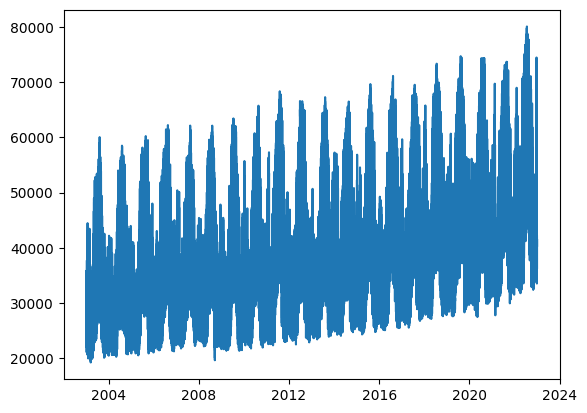

In [5]:
ercot = power_df["ERCOT"]
plt.plot(ercot)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


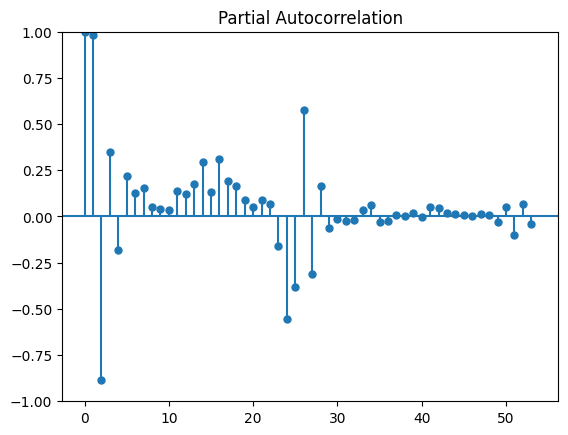

In [6]:
plot_pacf(ercot)
plt.show()

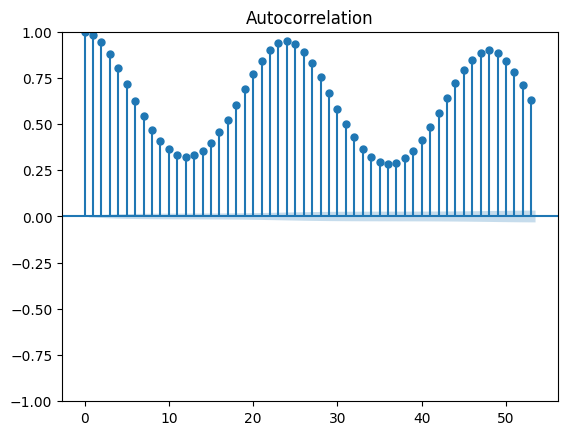

In [7]:
plot_acf(ercot)
plt.show()

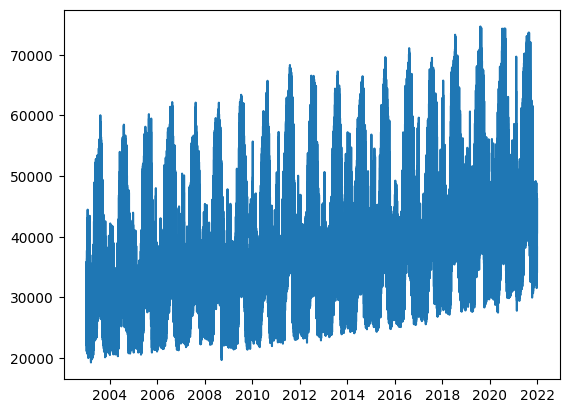

In [8]:
train_end = dt.datetime(2021,1,1)

train_data = ercot['2003':'2021'].asfreq('h')
test_data = ercot['2022'].asfreq('h')
plt.plot(train_data)
plt.show()

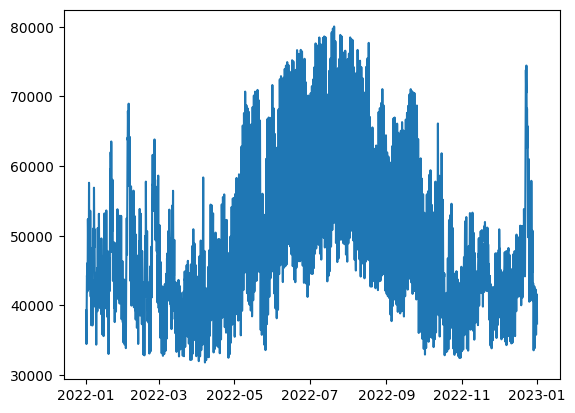

In [9]:
plt.plot(test_data)
plt.show()

In [10]:
train_data.dropna(inplace=True)
stepwise_fit = pm.auto_arima(train_data, start_p=1, d=1, start_q=1, max_p=7, 
        max_q=7, m=7, seasonal=True, stationary=False, information_criterion='aic', 
        stepwise=False, sippress_warnings=True).to_dict()

model = SARIMAX(train_data, order=stepwise_fit['order'], seasonal_order=stepwise_fit['seasonal_order'])
model_fit = model.fit()

In [ ]:
model_fit.summary()

In [ ]:
with open('sarimax_1_0_0.obj', 'wb') as handle:
        pickle.dump(model_fit, handle, protocol=pickle.HIGHEST_PROTOCOL)